In [3]:
!pip install bs4
!conda install -c conda-forge folium=0.5.0

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=2d2bba11d023c19ce95ef931334154b4a0e1e57a84ec715cb85d4136593a01b7
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/75/78/21/68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
Successfully built bs4
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.8-main

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.2               |     pyhd8ed1ab_0          26 KB  conda-forge
    certifi-2021.5.30          |   py38h578d9bd_0         141 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1k            

In [4]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from geopy.geocoders import Nominatim
import folium
import numpy as np

In [5]:
url="https://www.geonames.org/postalcode-search.html?q=&country=AU&adminCode1=VIC"
html_data=requests.get(url).text

In [6]:
soup=BeautifulSoup(html_data,"html5lib")

In [7]:
mel_table=soup.find_all("table",class_='restable')
mel_table

[<table class="restable">
 <tbody><tr><th></th><th>Place</th><th>Code</th><th>Country</th><th>Admin1</th><th>Admin2</th><th>Admin3</th></tr>
 <tr><td><small>1</small></td><td>Melbourne</td><td>3000</td><td>Australia</td><td>Victoria</td><td>MELBOURNE CITY</td><td></td></tr><tr><td></td><td colspan="6">   <a href="/maps/browse_-37.813_144.961.html" rel="nofollow"><small>-37.813/144.961</small></a></td></tr>
 <tr class="odd"><td><small>2</small></td><td>East Melbourne</td><td>3002</td><td>Australia</td><td>Victoria</td><td>MELBOURNE CITY</td><td></td></tr><tr class="odd"><td></td><td colspan="6">   <a href="/maps/browse_-37.813_144.984.html" rel="nofollow"><small>-37.813/144.984</small></a></td></tr>
 <tr><td><small>3</small></td><td>West Melbourne</td><td>3003</td><td>Australia</td><td>Victoria</td><td>MELBOURNE CITY</td><td></td></tr><tr><td></td><td colspan="6">   <a href="/maps/browse_-37.809_144.947.html" rel="nofollow"><small>-37.809/144.947</small></a></td></tr>
 <tr class="odd"><

In [8]:
table_rows=mel_table[0].find_all("tr")
l=[]
for tr in table_rows:
    col=tr.find_all("td")
    row=[tr.text for tr in col]
    l.append(row)
    
all_data=pd.DataFrame(l,columns=["index","Suburb","Code","Country","State","City","None"])
all_data

,index,Suburb,Code,Country,State,City,None
0,None,None,None,None,None,None,None
1,1,Melbourne,3000,Australia,Victoria,MELBOURNE CITY,
2,,-37.813/144.961,None,None,None,None,None
3,2,East Melbourne,3002,Australia,Victoria,MELBOURNE CITY,
4,,-37.813/144.984,None,None,None,None,None
...,...,...,...,...,...,...,...
397,199,Hillside,3037,Australia,Victoria,FOOTSCRAY,
398,,-37.691/144.743,None,None,None,None,None
399,200,Taylors Hill,3037,Australia,Victoria,,
400,,-37.715/144.753,None,None,None,None,None


In [9]:
is_place=(all_data["index"]!="")&(all_data["index"]!=None)
place_data=all_data[is_place]
place_data2=place_data.dropna()
place_data2.reset_index(inplace=True)
place_data2=place_data2.drop(place_data2.columns[[0,1,3,7]],axis=1)
place_data2

,Suburb,Country,State,City
0,Melbourne,Australia,Victoria,MELBOURNE CITY
1,East Melbourne,Australia,Victoria,MELBOURNE CITY
2,West Melbourne,Australia,Victoria,MELBOURNE CITY
3,Melbourne,Australia,Victoria,MELBOURNE CITY
4,Docklands,Australia,Victoria,MELBOURNE CITY
...,...,...,...,...
195,Travancore,Australia,Victoria,FOOTSCRAY
196,Avondale Heights,Australia,Victoria,FOOTSCRAY
197,Sydenham,Australia,Victoria,FOOTSCRAY
198,Hillside,Australia,Victoria,FOOTSCRAY


In [10]:
index_coord=all_data.index[all_data.isnull().any(axis=1)]

In [11]:
is_coord=all_data.iloc[index_coord,:]
is_coord2=is_coord.drop([is_coord.index[0],is_coord.index[201]])
is_coord2=is_coord2.rename(columns={'Suburb':'Coordinates'})
is_coord2[['Latitude','Longitude']]=is_coord2['Coordinates'].str.split('/',expand=True)
is_coord2.reset_index(inplace=True)
is_coord2=is_coord2.drop(is_coord.columns[[0,2,3,4,5,6]],axis=1)
is_coord2

,level_0,Coordinates,Latitude,Longitude
0,2,-37.813/144.961,-37.813,144.961
1,4,-37.813/144.984,-37.813,144.984
2,6,-37.809/144.947,-37.809,144.947
3,8,-37.842/144.976,-37.842,144.976
4,10,-37.818/144.944,-37.818,144.944
...,...,...,...,...
195,392,-37.783/144.937,-37.783,144.937
196,394,-37.761/144.862,-37.761,144.862
197,396,-37.7/144.766,-37.7,144.766
198,398,-37.691/144.743,-37.691,144.743


In [12]:
combined_data=pd.concat([place_data2,is_coord2],axis=1)
combined_data=combined_data.drop(combined_data.columns[[4]],axis=1)
combined_data

,Suburb,Country,State,City,Coordinates,Latitude,Longitude
0,Melbourne,Australia,Victoria,MELBOURNE CITY,-37.813/144.961,-37.813,144.961
1,East Melbourne,Australia,Victoria,MELBOURNE CITY,-37.813/144.984,-37.813,144.984
2,West Melbourne,Australia,Victoria,MELBOURNE CITY,-37.809/144.947,-37.809,144.947
3,Melbourne,Australia,Victoria,MELBOURNE CITY,-37.842/144.976,-37.842,144.976
4,Docklands,Australia,Victoria,MELBOURNE CITY,-37.818/144.944,-37.818,144.944
...,...,...,...,...,...,...,...
195,Travancore,Australia,Victoria,FOOTSCRAY,-37.783/144.937,-37.783,144.937
196,Avondale Heights,Australia,Victoria,FOOTSCRAY,-37.761/144.862,-37.761,144.862
197,Sydenham,Australia,Victoria,FOOTSCRAY,-37.7/144.766,-37.7,144.766
198,Hillside,Australia,Victoria,FOOTSCRAY,-37.691/144.743,-37.691,144.743


In [13]:
city_coord=combined_data[['Suburb','City','Latitude','Longitude']].copy()
city_coord

,Suburb,City,Latitude,Longitude
0,Melbourne,MELBOURNE CITY,-37.813,144.961
1,East Melbourne,MELBOURNE CITY,-37.813,144.984
2,West Melbourne,MELBOURNE CITY,-37.809,144.947
3,Melbourne,MELBOURNE CITY,-37.842,144.976
4,Docklands,MELBOURNE CITY,-37.818,144.944
...,...,...,...,...
195,Travancore,FOOTSCRAY,-37.783,144.937
196,Avondale Heights,FOOTSCRAY,-37.761,144.862
197,Sydenham,FOOTSCRAY,-37.7,144.766
198,Hillside,FOOTSCRAY,-37.691,144.743


In [14]:
unique_cities=city_coord['City'].unique()
unique_cities

array(['MELBOURNE CITY', 'FOOTSCRAY', '', 'MELB NORTH WEST', 'PRESTON',
       'HAWTHORN', 'RINGWOOD', 'MOORABBIN', 'FERNTREE GULLY', 'MULGRAVE',
       'DANDENONG', 'FRANKSTON', 'VIC COUNTRY', 'VIC FAR COUNTRY'],
      dtype=object)

In [15]:
suburb_list=['Balwyn','Melbourne','Footscray','Tarneit','Glenroy','Doncaster','Richmond','Blackburn','Mount Waverly','Keysborough','Frankston','Belmont','Portland']
suburb_data = city_coord[city_coord['Suburb'].isin(suburb_list)]
suburb_data=suburb_data.drop(suburb_data.columns[[1]],axis=1)
suburb_data

,Suburb,Latitude,Longitude
0,Melbourne,-37.813,144.961
3,Melbourne,-37.842,144.976
5,Footscray,-37.798,144.895
20,Tarneit,-37.844,144.673
31,Glenroy,-37.704,144.924
56,Balwyn,-37.81,145.083
60,Doncaster,-37.785,145.125
62,Richmond,-37.819,145.001
68,Blackburn,-37.821,145.151
93,Keysborough,-37.996,145.169


In [16]:
data_frame_of_coordinates = pd.DataFrame(suburb_data, columns=["Suburb", "Latitude","Longitude"])
data_frame_of_coordinates

,Suburb,Latitude,Longitude
0,Melbourne,-37.813,144.961
3,Melbourne,-37.842,144.976
5,Footscray,-37.798,144.895
20,Tarneit,-37.844,144.673
31,Glenroy,-37.704,144.924
56,Balwyn,-37.81,145.083
60,Doncaster,-37.785,145.125
62,Richmond,-37.819,145.001
68,Blackburn,-37.821,145.151
93,Keysborough,-37.996,145.169


In [17]:
address = 'Melbourne City, AUS'

geolocator = Nominatim(user_agent="aus_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geograpical coordinate of Melbourne City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Melbourne City are -37.8166793, 144.9924662.


In [18]:
#pull map for Melbourne City, Australia
map_aus = folium.Map(location=[latitude, longitude], zoom_start=12)
label = "Melbourne City, AUS"
label = folium.Popup(label, parse_html=True)
folium.CircleMarker(
    [latitude, longitude],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_aus)
    
map_aus

In [19]:
# The code was removed by Watson Studio for sharing.

In [20]:
data_frame_of_coordinates['Latitude']= data_frame_of_coordinates['Latitude'].str.strip()
data_frame_of_coordinates['Longitude']=data_frame_of_coordinates['Longitude'].str.strip()

In [31]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [32]:
melbourne_venues = getNearbyVenues(names=suburb_data['Suburb'],
                                   latitudes=suburb_data['Latitude'],
                                   longitudes=suburb_data['Longitude']
                                  )

Melbourne
Melbourne
Footscray
Tarneit
Glenroy
Balwyn
Doncaster
Richmond
Blackburn
Keysborough
Frankston
Belmont
Portland


In [33]:
melbourne_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Melbourne,-37.813,144.961,Shortstop Coffee & Donuts,-37.811240,144.961000,Donut Shop
1,Melbourne,-37.813,144.961,Tipo 00,-37.813527,144.961978,Italian Restaurant
2,Melbourne,-37.813,144.961,Brother Baba Budan,-37.813445,144.962137,Coffee Shop
3,Melbourne,-37.813,144.961,Brick Lane,-37.811341,144.959816,Café
4,Melbourne,-37.813,144.961,Whitehart,-37.812781,144.961973,Bar


In [34]:
melbourne_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Balwyn,19,19,19,19,19,19
Belmont,3,3,3,3,3,3
Blackburn,19,19,19,19,19,19
Doncaster,45,45,45,45,45,45
Footscray,35,35,35,35,35,35
Frankston,17,17,17,17,17,17
Glenroy,4,4,4,4,4,4
Keysborough,10,10,10,10,10,10
Melbourne,128,128,128,128,128,128


In [35]:
# one hot encoding
melbourne_onehot = pd.get_dummies(melbourne_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
melbourne_onehot['Neighborhood'] = melbourne_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [melbourne_onehot.columns[-1]] + list(melbourne_onehot.columns[:-1])
melbourne_onehot = melbourne_onehot[fixed_columns]

melbourne_onehot.head()

,Neighborhood,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,...,Theater,Thrift / Vintage Store,Toy / Game Store,Train Station,Tram Station,Turkish Restaurant,Udon Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar
0,Melbourne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Melbourne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Melbourne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Melbourne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Melbourne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
melbourne_grouped = melbourne_onehot.groupby('Neighborhood').mean().reset_index()
melbourne_grouped

,Neighborhood,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,...,Theater,Thrift / Vintage Store,Toy / Game Store,Train Station,Tram Station,Turkish Restaurant,Udon Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar
0,Balwyn,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000
1,Belmont,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Blackburn,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Doncaster,0.044444,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Footscray,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.028571,0.000000,0.000000,0.000000,0.028571,0.028571,0.142857,0.000000,0.000000
5,Frankston,0.000000,0.000000,0.000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Glenroy,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Keysborough,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Melbourne,0.000000,0.007812,0.000,0.007812,0.000000,0.007812,0.007812,0.000000,0.000000,...,0.007812,0.000000,0.007812,0.000000,0.007812,0.000000,0.000000,0.015625,0.007812,0.007812
9,Portland,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [37]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [38]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{}_Most_Common_Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th_Most_Common_Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = melbourne_grouped['Neighborhood']

for ind in np.arange(melbourne_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(melbourne_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st_Most_Common_Venue,2nd_Most_Common_Venue,3rd_Most_Common_Venue,4th_Most_Common_Venue,5th_Most_Common_Venue,6th_Most_Common_Venue,7th_Most_Common_Venue,8th_Most_Common_Venue,9th_Most_Common_Venue,10th_Most_Common_Venue
0,Balwyn,Pharmacy,Café,Grocery Store,Japanese Restaurant,Gym / Fitness Center,Farmers Market,Pizza Place,Sandwich Place,Seafood Restaurant,Convenience Store
1,Belmont,Chinese Restaurant,Grocery Store,Fish & Chips Shop,American Restaurant,Music Store,Portuguese Restaurant,Plaza,Playground,Pizza Place,Pharmacy
2,Blackburn,Café,Furniture / Home Store,Car Wash,Outdoor Supply Store,Park,Sushi Restaurant,Mexican Restaurant,Grocery Store,Indian Restaurant,Liquor Store
3,Doncaster,Café,Department Store,American Restaurant,Clothing Store,Multiplex,Dessert Shop,Supermarket,Electronics Store,Coffee Shop,Farmers Market
4,Footscray,Vietnamese Restaurant,Bar,Pub,Pharmacy,Café,Pizza Place,Convenience Store,Grocery Store,Sporting Goods Shop,Gym / Fitness Center
5,Frankston,Electronics Store,Sandwich Place,Grocery Store,Japanese Restaurant,Furniture / Home Store,Arts & Crafts Store,Pizza Place,Department Store,Train Station,Food Court
6,Glenroy,Restaurant,Himalayan Restaurant,Furniture / Home Store,Dessert Shop,Korean BBQ Restaurant,Music Store,Portuguese Restaurant,Plaza,Playground,Pizza Place
7,Keysborough,Supermarket,Fast Food Restaurant,Gym,Pizza Place,Pharmacy,Shopping Mall,Chinese Restaurant,Portuguese Restaurant,Liquor Store,Paper / Office Supplies Store
8,Melbourne,Café,Coffee Shop,Bar,Dessert Shop,Korean Restaurant,Italian Restaurant,Gym,Japanese Restaurant,Mexican Restaurant,Clothing Store
9,Portland,Restaurant,Hotel,Grocery Store,Supermarket,Movie Theater,Plaza,Playground,Pizza Place,Pharmacy,Pet Store


In [43]:
ten_score=10
ten = {'Café': 5*ten_score,
       'Restaurant': 3*ten_score,
       'Cupcake Shop':0,
       'Vietnamese Restaurant':3*ten_score,
       'Electronics Store':0,
       'Fast Food Restaurant':0,
       'Discount Store':0,
       'Pharmacy':2*ten_score,
       'Grocery Store':2*ten_score,
       'Furniture / Home Store':0,
       'Department Store':2*ten_score,
       'Bar': 5*ten_score,
       'Sandwich Place':3*ten_score,
       'Supermarket':2*ten_score,
       'Coffee Shop':3*ten_score,
       'Hotel':0,
       'Arcade':0,
       'Japanese Restaurant':3*ten_score,
       'Laundromat':0,
       'Bakery':0,
       'American Restaurant':3*ten_score,
       'Chinese Restaurant':3*ten_score,
       'Grocery Store':2*ten_score,
       'Dessert Shop':0,
       'Portuguese Restaurant':3*ten_score,
       'Playground':0,
       'Park':0,
       'Multiplex':0,
       'Pub': 5*ten_score,
       'Movie Theater':0,
       'Pizza Place':3*ten_score,
       'Shopping Mall':0,
       'Thai Restaurant':3*ten_score,
       'Ethiopian Restaurant':3*ten_score,
       'Food & Drink Shop':3*ten_score,
       'Gym': 5*ten_score,
       'Sushi Restaurant':3*ten_score,
       'French Restaurant':3*ten_score,
       'Shop & Service':0,
       'Italian Restaurant':3*ten_score,
       'Mexican Restaurant':3*ten_score,
       'Plaza':0,
       'Boxing Gym': 5*ten_score,
       'Pet Store':0,
       'Skate Park':0,
       'Seafood Restaurant':3*ten_score,
       'Dim Sum Restaurant':3*ten_score,
       'Convenience Store':2*ten_score,
       'Cosmetics Shop':0,
       'Korean Restaurant':3*ten_score,
       'Train Station':0,
       'Greek Restaurant':3*ten_score,
      }

nine_score=9
nine = {'Café': 5*nine_score,
       'Restaurant': 3*nine_score,
       'Cupcake Shop':0*nine_score,
       'Vietnamese Restaurant':3*nine_score,
       'Electronics Store':0,
       'Fast Food Restaurant':0,
       'Himalayan Restaurant':3*nine_score,
       'Discount Store':0,
       'Pharmacy':2*nine_score,
       'Grocery Store':2*nine_score,
       'Furniture / Home Store':0,
       'Department Store':2*nine_score,
       'Bar': 5*nine_score,
       'Sandwich Place':3*nine_score,
       'Supermarket':2*nine_score,
       'Coffee Shop':3*nine_score,
       'Hotel':0,
       'Arcade':0,
       'Japanese Restaurant':3*nine_score,
       'Laundromat':0,
       'Bakery':0,
       'American Restaurant':3*nine_score,
       'Chinese Restaurant':3*nine_score,
       'Grocery Store':2*nine_score,
       'Dessert Shop':0,
       'Portuguese Restaurant':3*nine_score,
       'Playground':0,
       'Park':0,
       'Multiplex':0,
       'Pub': 5*nine_score,
       'Movie Theater':0,
       'Pizza Place':3*nine_score,
       'Shopping Mall':0,
       'Thai Restaurant':3*nine_score,
       'Ethiopian Restaurant':3*nine_score,
       'Food & Drink Shop':3*nine_score,
       'Gym': 5*nine_score,
       'Sushi Restaurant':3*nine_score,
       'French Restaurant':3*nine_score,
       'Shop & Service':0,
       'Italian Restaurant':3*nine_score,
       'Mexican Restaurant':3*nine_score,
       'Plaza':0,
       'Boxing Gym': 5*nine_score,
       'Pet Store':0,
       'Skate Park':0,
       'Seafood Restaurant':3*nine_score,
       'Dim Sum Restaurant':3*nine_score,
       'Convenience Store':2*nine_score,
       'Cosmetics Shop':0,
       'Korean Restaurant':3*nine_score,
       'Train Station':0,
       'Greek Restaurant':3*nine_score,
      }

eight_score=8
eight = {'Café': 5*eight_score,
       'Restaurant': 3*eight_score,
       'Cupcake Shop':0*eight_score,
       'Vietnamese Restaurant':3*eight_score,
       'Electronics Store':0,
       'Fast Food Restaurant':0,
       'Discount Store':0,
       'Pharmacy':2*eight_score,
       'Grocery Store':2*eight_score,
       'Furniture / Home Store':0,
       'Department Store':2*eight_score,
       'Bar': 5*eight_score,
       'Sandwich Place':3*eight_score,
       'Supermarket':2*eight_score,
       'Coffee Shop':3*eight_score,
       'Hotel':0,
       'Arcade':0,
       'Japanese Restaurant':3*eight_score,
       'Laundromat':0,
       'Bakery':0,
       'American Restaurant':3*eight_score,
       'Chinese Restaurant':3*eight_score,
       'Grocery Store':2*eight_score,
       'Dessert Shop':0,
       'Portuguese Restaurant':3*eight_score,
       'Playground':0,
       'Park':0,
       'Multiplex':0,
       'Pub': 5*eight_score,
       'Movie Theater':0,
       'Pizza Place':3*eight_score,
       'Shopping Mall':0,
       'Thai Restaurant':3*eight_score,
       'Ethiopian Restaurant':3*eight_score,
       'Fish & Chips Shop':3*eight_score,
       'Food & Drink Shop':3*eight_score,
       'Gym': 5*eight_score,
       'Sushi Restaurant':3*eight_score,
       'French Restaurant':3*eight_score,
       'Shop & Service':0,
       'Italian Restaurant':3*eight_score,
       'Mexican Restaurant':3*eight_score,
       'Plaza':0,
       'Boxing Gym': 5*eight_score,
       'Pet Store':0,
       'Skate Park':0,
       'Car Wash':0,
       'Seafood Restaurant':3*eight_score,
       'Dim Sum Restaurant':3*eight_score,
       'Convenience Store':2*eight_score,
       'Cosmetics Shop':0,
       'Korean Restaurant':3*eight_score,
       'Train Station':0,
       'Greek Restaurant':3*eight_score,
      }

seven_score=7
seven = {'Café': 5*seven_score,
       'Restaurant': 3*seven_score,
       'Cupcake Shop':0*seven_score,
       'Vietnamese Restaurant':3*seven_score,
       'Electronics Store':0,
       'Fast Food Restaurant':0,
       'Discount Store':0,
       'Pharmacy':2*seven_score,
       'Grocery Store':2*seven_score,
       'Furniture / Home Store':0,
       'Department Store':2*seven_score,
       'Bar': 5*seven_score,
       'Sandwich Place':3*seven_score,
       'Supermarket':2*seven_score,
       'Coffee Shop':3*seven_score,
       'Hotel':0,
       'Arcade':0,
       'Japanese Restaurant':3*seven_score,
       'Laundromat':0,
       'Bakery':0,
       'American Restaurant':3*seven_score,
       'Chinese Restaurant':3*seven_score,
       'Grocery Store':2*seven_score,
       'Dessert Shop':0,
       'Portuguese Restaurant':3*seven_score,
       'Playground':0,
       'Park':0,
       'Multiplex':0,
       'Pub': 5*seven_score,
       'Movie Theater':0,
       'Pizza Place':3*seven_score,
       'Shopping Mall':0,
       'Thai Restaurant':3*seven_score,
       'Ethiopian Restaurant':3*seven_score,
       'Food & Drink Shop':3*seven_score,
       'Gym': 5*seven_score,
       'Sushi Restaurant':3*seven_score,
       'French Restaurant':3*seven_score,
       'Shop & Service':0,
       'Italian Restaurant':3*seven_score,
       'Mexican Restaurant':3*seven_score,
       'Plaza':0,
       'Boxing Gym': 5*seven_score,
       'Pet Store':0,
       'Skate Park':0,
       'Seafood Restaurant':3*seven_score,
       'Dim Sum Restaurant':3*seven_score,
       'Convenience Store':2*seven_score,
       'Cosmetics Shop':0,
       'Korean Restaurant':3*seven_score,
       'Train Station':0,
       'Greek Restaurant':3*seven_score,
       'Clothing Store':0,
       'Outdoor Supply Store':0,
      }

six_score=6
six = {'Café': 5*six_score,
       'Restaurant': 3*six_score,
       'Cupcake Shop':0*six_score,
       'Vietnamese Restaurant':3*six_score,
       'Electronics Store':0,
       'Fast Food Restaurant':0,
       'Discount Store':0,
       'Pharmacy':2*six_score,
       'Grocery Store':2*six_score,
       'Furniture / Home Store':0,
       'Department Store':2*six_score,
       'Bar': 5*six_score,
       'Sandwich Place':3*six_score,
       'Supermarket':2*six_score,
       'Coffee Shop':3*six_score,
       'Hotel':0,
       'Arcade':0,
       'Japanese Restaurant':3*six_score,
       'Laundromat':0,
       'Bakery':0,
       'American Restaurant':3*six_score,
       'Chinese Restaurant':3*six_score,
       'Grocery Store':2*six_score,
       'Dessert Shop':0,
       'Portuguese Restaurant':3*six_score,
       'Playground':0,
       'Park':0,
       'Multiplex':0,
       'Pub': 5*six_score,
       'Movie Theater':0,
       'Pizza Place':3*six_score,
       'Shopping Mall':0,
       'Thai Restaurant':3*six_score,
       'Ethiopian Restaurant':3*six_score,
       'Food & Drink Shop':3*six_score,
       'Gym': 5*six_score,
       'Sushi Restaurant':3*six_score,
       'Outdoor Supply Store':0,
       'Clothing Store':0,
       'French Restaurant':3*six_score,
       'Shop & Service':0,
       'Italian Restaurant':3*six_score,
       'Mexican Restaurant':3*six_score,
       'Plaza':0,
       'Boxing Gym': 5*six_score,
       'Pet Store':0,
       'Skate Park':0,
       'Seafood Restaurant':3*six_score,
       'Dim Sum Restaurant':3*six_score,
       'Convenience Store':2*six_score,
       'Cosmetics Shop':0,
       'Korean Restaurant':3*six_score,
       'Train Station':0,
       'Greek Restaurant':3*six_score,
       'Gym / Fitness Center':5*six_score,
       'Music Store':0,
       'Korean BBQ Restaurant':3*six_score,
      }

five_score=5
five = {'Café': 5*five_score,
       'Restaurant': 3*five_score,
       'Cupcake Shop':0*five_score,
       'Vietnamese Restaurant':3*five_score,
       'Electronics Store':0,
       'Fast Food Restaurant':0,
       'Discount Store':0,
       'Pharmacy':2*five_score,
       'Grocery Store':2*five_score,
       'Furniture / Home Store':0,
       'Department Store':2*five_score,
       'Bar': 5*five_score,
       'Sandwich Place':3*five_score,
       'Supermarket':2*five_score,
       'Coffee Shop':3*five_score,
       'Hotel':0,
       'Arcade':0,
       'Japanese Restaurant':3*five_score,
       'Laundromat':0,
       'Bakery':0,
       'American Restaurant':3*five_score,
       'Chinese Restaurant':3*five_score,
       'Grocery Store':2*five_score,
       'Dessert Shop':0,
       'Portuguese Restaurant':3*five_score,
       'Playground':0,
       'Park':0,
       'Multiplex':0,
       'Gym / Fitness Center':5*five_score,
       'Pub': 5*five_score,
       'Movie Theater':0,
       'Pizza Place':3*five_score,
       'Shopping Mall':0,
       'Thai Restaurant':3*five_score,
       'Ethiopian Restaurant':3*five_score,
       'Food & Drink Shop':3*five_score,
       'Gym': 5*five_score,
       'Sushi Restaurant':3*five_score,
       'French Restaurant':3*five_score,
       'Shop & Service':0,
       'Italian Restaurant':3*five_score,
       'Mexican Restaurant':3*five_score,
       'Plaza':0,
       'Music Store':0,
       'Boxing Gym': 5*five_score,
       'Pet Store':0,
       'Skate Park':0,
       'Seafood Restaurant':3*five_score,
       'Dim Sum Restaurant':3*five_score,
       'Korean BBQ Restaurant':3*five_score,
       'Convenience Store':2*five_score,
       'Cosmetics Shop':0,
       'Korean Restaurant':3*five_score,
       'Train Station':0,
       'Greek Restaurant':3*five_score,
       'Farmers Market':0,
       'Arts & Crafts Store':0,
       'Liquor Store':0,
      }

four_score=4
four = {'Café': 5*four_score,
       'Restaurant': 3*four_score,
       'Cupcake Shop':0*four_score,
       'Vietnamese Restaurant':3*four_score,
       'Electronics Store':0,
       'Fast Food Restaurant':0,
       'Discount Store':0,
       'Pharmacy':2*four_score,
       'Grocery Store':2*four_score,
       'Furniture / Home Store':0,
       'Department Store':2*four_score,
       'Bar': 5*four_score,
       'Sandwich Place':3*four_score,
       'Supermarket':2*four_score,
       'Coffee Shop':3*four_score,
       'Hotel':0,
       'Arcade':0,
       'Japanese Restaurant':3*four_score,
       'Laundromat':0,
       'Bakery':0,
       'American Restaurant':3*four_score,
       'Chinese Restaurant':3*four_score,
       'Grocery Store':2*four_score,
       'Dessert Shop':0,
       'Portuguese Restaurant':3*four_score,
       'Playground':0,
       'Park':0,
       'Multiplex':0,
       'Pub': 5*four_score,
       'Movie Theater':0,
       'Pizza Place':3*four_score,
       'Shopping Mall':0,
       'Thai Restaurant':3*four_score,
       'Ethiopian Restaurant':3*four_score,
       'Food & Drink Shop':3*four_score,
       'Gym': 5*four_score,
       'Sushi Restaurant':3*four_score,
       'French Restaurant':3*four_score,
       'Shop & Service':0,
       'Italian Restaurant':3*four_score,
       'Mexican Restaurant':3*four_score,
       'Plaza':0,
       'Boxing Gym': 5*four_score,
       'Pet Store':0,
       'Farmers Market':0,
       'Skate Park':0,
       'Arts & Crafts Store':0,
       'Seafood Restaurant':3*four_score,
       'Dim Sum Restaurant':3*four_score,
       'Convenience Store':2*four_score,
       'Cosmetics Shop':0,
       'Music Store':0,
       'Korean Restaurant':3*four_score,
       'Train Station':0,
       'Greek Restaurant':3*four_score,
       'Liquor Store':0,
      }

three_score=3
three = {'Café': 5*three_score,
       'Restaurant': 3*three_score,
       'Cupcake Shop':0*three_score,
       'Vietnamese Restaurant':3*three_score,
       'Electronics Store':0,
       'Fast Food Restaurant':0,
       'Discount Store':0,
       'Pharmacy':2*three_score,
       'Grocery Store':2*three_score,
       'Furniture / Home Store':0,
       'Department Store':2*three_score,
       'Bar': 5*three_score,
       'Sandwich Place':3*three_score,
       'Supermarket':2*three_score,
       'Coffee Shop':3*three_score,
       'Hotel':0,
       'Arcade':0,
       'Japanese Restaurant':3*three_score,
       'Laundromat':0,
       'Bakery':0,
       'American Restaurant':3*three_score,
       'Chinese Restaurant':3*three_score,
       'Grocery Store':2*three_score,
       'Dessert Shop':0,
       'Portuguese Restaurant':3*three_score,
       'Playground':0,
       'Park':0,
       'Multiplex':0,
       'Pub': 5*three_score,
       'Movie Theater':0,
       'Pizza Place':3*three_score,
       'Shopping Mall':0,
       'Thai Restaurant':3*three_score,
       'Ethiopian Restaurant':3*three_score,
       'Food & Drink Shop':3*three_score,
       'Gym': 5*three_score,
       'Sushi Restaurant':3*three_score,
       'French Restaurant':3*three_score,
       'Shop & Service':0,
       'Italian Restaurant':3*three_score,
       'Mexican Restaurant':3*three_score,
       'Plaza':0,
       'Boxing Gym': 5*three_score,
       'Pet Store':0,
       'Skate Park':0,
       'Seafood Restaurant':3*three_score,
       'Dim Sum Restaurant':3*three_score,
       'Convenience Store':2*three_score,
       'Cosmetics Shop':0,
       'Korean Restaurant':3*three_score,
       'Train Station':0,
       'Greek Restaurant':3*three_score,
       'Liquor Store':0,
      }

two_score=2
two = {'Café': 5*two_score,
       'Restaurant': 3*two_score,
       'Cupcake Shop':0*two_score,
       'Vietnamese Restaurant':3*two_score,
       'Electronics Store':0,
       'Fast Food Restaurant':0,
       'Discount Store':0,
       'Pharmacy':2*two_score,
       'Grocery Store':2*two_score,
       'Furniture / Home Store':0,
       'Department Store':2*two_score,
       'Bar': 5*two_score,
       'Sandwich Place':3*two_score,
       'Supermarket':2*two_score,
       'Coffee Shop':3*two_score,
       'Hotel':0,
       'Arcade':0,
       'Japanese Restaurant':3*two_score,
       'Laundromat':0,
       'Bakery':0,
       'American Restaurant':3*two_score,
       'Chinese Restaurant':3*two_score,
       'Grocery Store':2*two_score,
       'Dessert Shop':0,
       'Portuguese Restaurant':3*two_score,
       'Playground':0,
       'Park':0,
       'Multiplex':0,
       'Pub': 5*two_score,
       'Movie Theater':0,
       'Pizza Place':3*two_score,
       'Shopping Mall':0,
       'Thai Restaurant':3*two_score,
       'Ethiopian Restaurant':3*two_score,
       'Food & Drink Shop':3*two_score,
       'Gym': 5*two_score,
       'Sushi Restaurant':3*two_score,
       'French Restaurant':3*two_score,
       'Shop & Service':0,
       'Italian Restaurant':3*two_score,
       'Mexican Restaurant':3*two_score,
       'Plaza':0,
       'Boxing Gym': 5*two_score,
       'Pet Store':0,
       'Skate Park':0,
       'Seafood Restaurant':3*two_score,
       'Dim Sum Restaurant':3*two_score,
       'Convenience Store':2*two_score,
       'Cosmetics Shop':0,
       'Korean Restaurant':3*two_score,
       'Train Station':0,
       'Greek Restaurant':3*two_score,
       'Clothing Store':0,
       'Liquor Store':0,
       'Indian Restaurant':3*two_score,
       'Sporting Goods Shop':0,
       'Austrian Restaurant':3*two_score,
      }

one_score=1
one = {'Café': 5*one_score,
       'Restaurant': 3*one_score,
       'Cupcake Shop':0*one_score,
       'Vietnamese Restaurant':3*one_score,
       'Electronics Store':0,
       'Fast Food Restaurant':0,
       'Discount Store':0,
       'Pharmacy':2*one_score,
       'Grocery Store':2*one_score,
       'Furniture / Home Store':0,
       'Department Store':2*one_score,
       'Bar': 5*one_score,
       'Sandwich Place':3*one_score,
       'Supermarket':2*one_score,
       'Coffee Shop':3*one_score,
       'Hotel':0,
       'Arcade':0,
       'Japanese Restaurant':3*one_score,
       'Laundromat':0,
       'Bakery':0,
       'American Restaurant':3*one_score,
       'Chinese Restaurant':3*one_score,
       'Grocery Store':2*one_score,
       'Dessert Shop':0,
       'Portuguese Restaurant':3*one_score,
       'Playground':0,
       'Park':0,
       'Multiplex':0,
       'Pub': 5*one_score,
       'Movie Theater':0,
       'Pizza Place':3*one_score,
       'Shopping Mall':0,
       'Thai Restaurant':3*one_score,
       'Ethiopian Restaurant':3*one_score,
       'Food & Drink Shop':3*one_score,
       'Gym': 5*one_score,
       'Sushi Restaurant':3*one_score,
       'French Restaurant':3*one_score,
       'Shop & Service':0,
       'Italian Restaurant':3*one_score,
       'Mexican Restaurant':3*one_score,
       'Plaza':0,
       'Boxing Gym': 5*one_score,
       'Pet Store':0,
       'Skate Park':0,
       'Seafood Restaurant':3*one_score,
       'Dim Sum Restaurant':3*one_score,
       'Convenience Store':2*one_score,
       'Cosmetics Shop':0,
       'Korean Restaurant':3*one_score,
       'Train Station':0,
       'Greek Restaurant':3*one_score,
       'Clothing Store':0,
       'Liquor Store':0,
       'Farmers Market':0,
       'Gym / Fitness Center':5*one_score,
       'Food Court':2,
       'Paper / Office Supplies Store':0,
       'Frozen Yogurt Shop':0,
      }

In [44]:
neighborhoods_venues_sorted['1st_Most_Common_Venue'] = neighborhoods_venues_sorted['1st_Most_Common_Venue'].replace(ten)
neighborhoods_venues_sorted['2nd_Most_Common_Venue'] = neighborhoods_venues_sorted['2nd_Most_Common_Venue'].replace(nine)
neighborhoods_venues_sorted['3rd_Most_Common_Venue'] = neighborhoods_venues_sorted['3rd_Most_Common_Venue'].replace(eight)
neighborhoods_venues_sorted['4th_Most_Common_Venue'] = neighborhoods_venues_sorted['4th_Most_Common_Venue'].replace(seven)
neighborhoods_venues_sorted['5th_Most_Common_Venue'] = neighborhoods_venues_sorted['5th_Most_Common_Venue'].replace(six)
neighborhoods_venues_sorted['6th_Most_Common_Venue'] = neighborhoods_venues_sorted['6th_Most_Common_Venue'].replace(five)
neighborhoods_venues_sorted['7th_Most_Common_Venue'] = neighborhoods_venues_sorted['7th_Most_Common_Venue'].replace(four)
neighborhoods_venues_sorted['8th_Most_Common_Venue'] = neighborhoods_venues_sorted['8th_Most_Common_Venue'].replace(three)
neighborhoods_venues_sorted['9th_Most_Common_Venue'] = neighborhoods_venues_sorted['9th_Most_Common_Venue'].replace(two)
neighborhoods_venues_sorted['10th_Most_Common_Venue'] = neighborhoods_venues_sorted['10th_Most_Common_Venue'].replace(one)

neighborhoods_venues_sorted

,Neighborhood,1st_Most_Common_Venue,2nd_Most_Common_Venue,3rd_Most_Common_Venue,4th_Most_Common_Venue,5th_Most_Common_Venue,6th_Most_Common_Venue,7th_Most_Common_Venue,8th_Most_Common_Venue,9th_Most_Common_Venue,10th_Most_Common_Venue
0,Balwyn,20,45,16,21,30,0,12,9,6,2
1,Belmont,30,18,24,21,0,15,0,0,6,2
2,Blackburn,50,0,0,0,0,15,12,6,6,0
3,Doncaster,50,18,24,0,0,0,8,0,6,0
4,Footscray,30,45,40,14,30,15,8,6,0,5
5,Frankston,0,27,16,21,0,0,12,6,0,2
6,Glenroy,30,27,0,0,18,0,12,0,0,3
7,Keysborough,20,0,40,21,12,0,12,9,0,0
8,Melbourne,50,27,40,0,18,15,20,9,6,0
9,Portland,30,0,16,14,0,0,0,9,4,0


In [45]:
neighborhoods_venues_sorted['Total'] = neighborhoods_venues_sorted.sum(axis=1)
neighborhoods_venues_sorted

,Neighborhood,1st_Most_Common_Venue,2nd_Most_Common_Venue,3rd_Most_Common_Venue,4th_Most_Common_Venue,5th_Most_Common_Venue,6th_Most_Common_Venue,7th_Most_Common_Venue,8th_Most_Common_Venue,9th_Most_Common_Venue,10th_Most_Common_Venue,Total
0,Balwyn,20,45,16,21,30,0,12,9,6,2,161
1,Belmont,30,18,24,21,0,15,0,0,6,2,116
2,Blackburn,50,0,0,0,0,15,12,6,6,0,89
3,Doncaster,50,18,24,0,0,0,8,0,6,0,106
4,Footscray,30,45,40,14,30,15,8,6,0,5,193
5,Frankston,0,27,16,21,0,0,12,6,0,2,84
6,Glenroy,30,27,0,0,18,0,12,0,0,3,90
7,Keysborough,20,0,40,21,12,0,12,9,0,0,114
8,Melbourne,50,27,40,0,18,15,20,9,6,0,185
9,Portland,30,0,16,14,0,0,0,9,4,0,73


In [51]:
neighborhoods_scores=neighborhoods_venues_sorted[['Neighborhood','Total']].copy()
neighborhoods_scores.set_index('Neighborhood', inplace=True)
neighborhoods_scores

,Total
Neighborhood,
Balwyn,161
Belmont,116
Blackburn,89
Doncaster,106
Footscray,193
Frankston,84
Glenroy,90
Keysborough,114
Melbourne,185


In [48]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

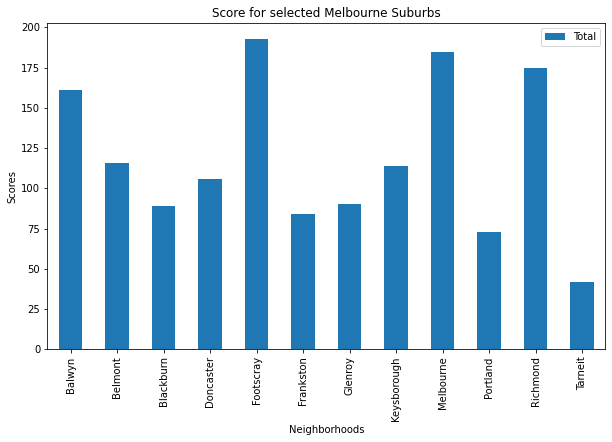

In [52]:
neighborhoods_scores.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Neighborhoods') # add to x-label to the plot
plt.ylabel('Scores') # add y-label to the plot
plt.title('Score for selected Melbourne Suburbs') # add title to the plot

plt.show()